## 5.2.1 적은 데이터셋 문제에서 딥러닝의 타당성

In [ ]:
# 모델이 작고 규제가 잘 되어 있으며 간단한 작업이라면 수백 개의 샘플로도 충분히 가능
# speech-to-text

## 5.2.2 데이터 내려받기

In [1]:
# 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os, shutil

original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
#os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)


# 고양이 이미지 1000개를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 고양이 이미지 500개를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 고양이 이미지 500개를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 강아지 이미지 1000개를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 강아지 이미지 500개를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 강아지 이미지 500개를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
    

## 5.2.3 네트워크 구성하기

In [2]:
# 강아지 vs 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

C:\Users\eunbi\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\eunbi\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\eunbi\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\eunbi\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [6]:
# 모델의 훈련 설정하기
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 5.2.4 데이터 전처리

In [7]:
# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255 스케일로 진행
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [8]:
# 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 62s 622ms/step - loss: 0.6884 - acc: 0.5385 - val_loss: 0.6739 - val_acc: 0.5690
Epoch 2/30
100/100 [==============================] - 56s 559ms/step - loss: 0.6549 - acc: 0.6145 - val_loss: 0.6145 - val_acc: 0.7000
Epoch 3/30
100/100 [==============================] - 56s 555ms/step - loss: 0.6096 - acc: 0.6635 - val_loss: 0.5957 - val_acc: 0.6540
Epoch 4/30
100/100 [==============================] - 55s 551ms/step - loss: 0.5669 - acc: 0.7050 - val_loss: 0.5354 - val_acc: 0.7260
Epoch 5/30
100/100 [==============================] - 57s 570ms/step - loss: 0.5326 - acc: 0.7215 - val_loss: 0.5363 - val_acc: 0.7200
Epoch 6/30
100/100 [==============================] - 56s 558ms/step - loss: 0.4989 - acc: 0.7490 - val_loss: 0.4652 - val_acc: 0.7700
Epoch 7/30
100/100 [==============================] - 56s 559ms/step - loss: 0.4746 - acc: 0.7640 - val_loss: 0.5350 - val_acc: 0.7230
Epoch 8/30
100/100 [==============================] - 5

In [9]:
# 모델 저장하기
model.save('cats_and_dogs_small_1.h5')

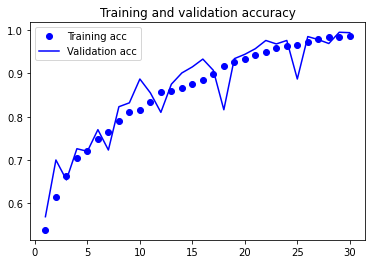

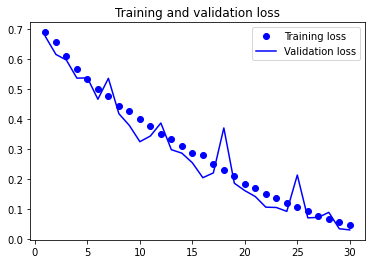

In [11]:
# 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


## 5.2.5 데이터 증식 사용하기

In [13]:
# ImageDataGenerator를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest')

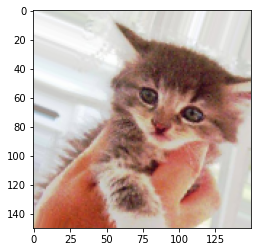

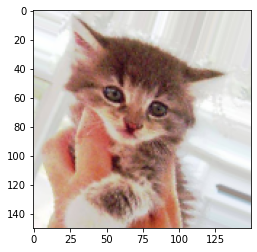

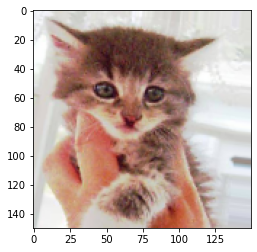

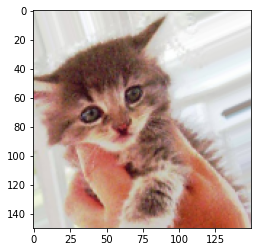

In [17]:
# 랜덤하게 증식된 훈련 이미지 그리기
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

In [18]:
# 드롭아웃을 포함한 새로운 컨브넷 정의하기
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# 데이터 증식 제너레이터를 사용하여 컨브넷 훈련하기
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 94s 937ms/step - loss: 0.6940 - acc: 0.5088 - val_loss: 0.6906 - val_acc: 0.5025
Epoch 2/100
100/100 [==============================] - 86s 864ms/step - loss: 0.6907 - acc: 0.5230 - val_loss: 0.6779 - val_acc: 0.5554
Epoch 3/100
100/100 [==============================] - 91s 912ms/step - loss: 0.6841 - acc: 0.5462 - val_loss: 0.6702 - val_acc: 0.5914
Epoch 4/100
100/100 [==============================] - 91s 915ms/step - loss: 0.6763 - acc: 0.5723 - val_loss: 0.6565 - val_acc: 0.5889
Epoch 5/100
 45/100 [============>.................] - ETA: 44s - loss: 0.6720 - acc: 0.5850

In [20]:
# 모델 저장하기
model.save('cats_and_dogs_small_2.h5')